# Clustering

## Load the usual Iris data restricted to the first two features, and ignore the class/ target variable.  Plot the data and see for yourself how "clustered" you think it looks.  Include the plot, and mention how many clusters you think exist (no wrong answer here).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

from IPython.display import display
from numpy import atleast_2d as twod

plt.style.use("/Users/brookeryan/Developer/CS273A Homework/seawitch.mplstyle")

In [2]:
path = "/Users/brookeryan/Developer/CS273A Homework/Homework5/data/iris.txt"
iris = np.genfromtxt(path , delimiter = None)   # load the text file
X = iris[:,0:2]                    # first two columns/features
Y = iris[:,-1]
feature0 = iris[:, 0:1]
feature1 = iris[:, 1:2]

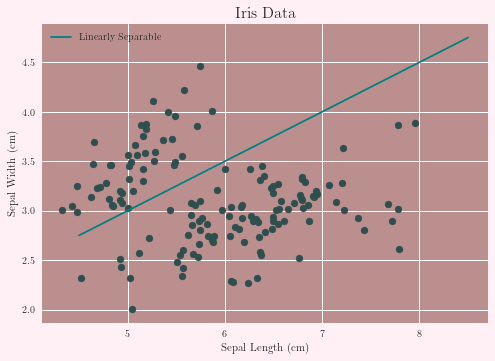

In [3]:
plt.scatter(feature0, feature1)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Iris Data")
x = np.linspace(4.5,8.5)
y = x/2 + 1/2
plt.plot(x, y, label='Linearly Separable', color='teal')
plt.legend()

plt.show()

I think that there are two clusters which can be approximately linearly separated by the line $y = \frac{1}{2}x + \frac{1}{2}$, which I have generated above for reference.  One above the line and one below the line.

## Run `k-means` on the data, for `k=2`, `k=5`, and `k=20`.  Try at least 5 different initializations and check to see whether they find the same solution; if not, pick the one with the best score.  For the chosen assignment for each `k`, include a plot with the data, colored by assignment, and the cluster centers.

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
      k-means clustering
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

-----------------
      k =  2
-----------------
initialization:  random 	 sumd:  57.877648396983034
initialization:  random 	 sumd:  57.87966196118197
initialization:  random 	 sumd:  57.877648396983034
initialization:  farthest 	 sumd:  57.87966196118197
initialization:  k++	 	 sumd:  57.87966196118197

best method:  random
lowest sumd:  57.877648396983034

-----------------
      k =  5
-----------------
initialization:  random 	 sumd:  24.26678719936935
initialization:  random 	 sumd:  26.828003931462174
initialization:  random 	 sumd:  21.341435584990826
initialization:  farthest 	 sumd:  21.0902063018713
initialization:  k++	 	 sumd:  24.25732743461259

best method:  farthest
lowest sumd:  21.0902063018713

-----------------
      k =  20
-----------------
initialization:  random 	 sumd:  4.81804614702462
initialization:  random 	 sumd:  4.762179917145129
initialization:  random 	 sumd

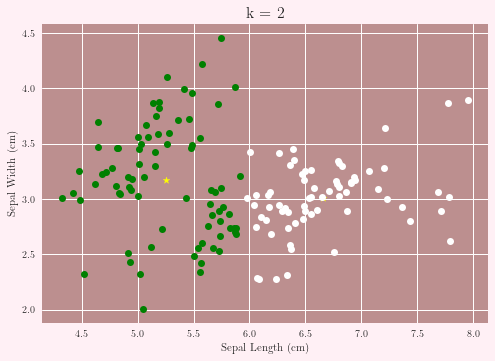

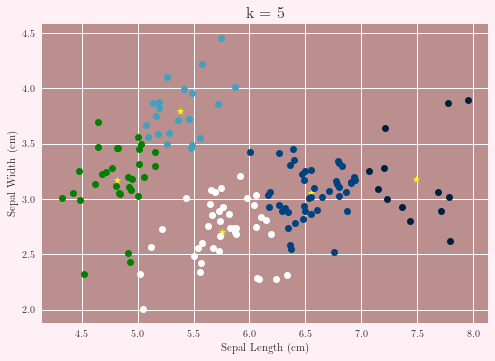

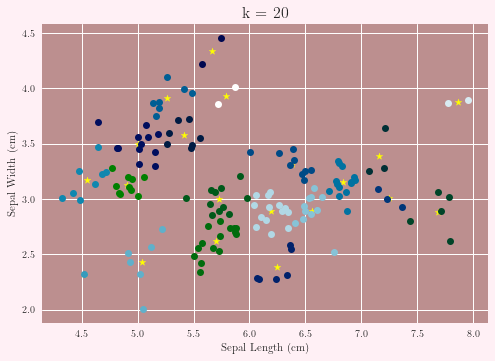

In [4]:
# Using random 3x because will get a different centroid point each time
initializations = ['random', 'random', 'random', 'farthest', 'k++\t']
K = [2, 5, 20]

# Output for each iteration
z = [0]*len(initializations)
c = [0]*len(initializations)
sumd = [0]*len(initializations)

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('      k-means clustering')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n')

# Initialize best index to 0, in the case that all sumd values are the same.
best = 0
figtext = ""
for i, k in enumerate(K):
    print('-----------------')
    print('      k = ', k)
    print('-----------------')
    for j, init in enumerate(initializations):
        z[j], c[j], sumd[j] = ml.cluster.kmeans(X, k, init=init.strip())
        print('initialization: ', init, '\t sumd: ', sumd[j])

    # Check whether the same solution was found for the different methods
    if np.unique(sumd).size > 1:
        best = np.argmin(sumd)
        print('\nbest method: ', initializations[best])
    print('lowest sumd: ', sumd[best])

    fig, ax = plt.subplots()
    ml.plotClassify2D(None, X, z[best])
    # Plotting the centers
    ax.scatter(c[best][:, 0], c[best][:, 1], marker='*', facecolor='yellow')
    plt.title('k = ' + k.__str__())
    plt.xlabel("Sepal Length (cm)")
    plt.ylabel("Sepal Width (cm)")
    print()

## Run agglomerative clustering on the data, using single linkage and then again using complete linkage, each with 2, 5, and then 20 clusters (using ml.cluster.agglomerative from cluster.py). Again, plot with color the final assignment of the clusters.

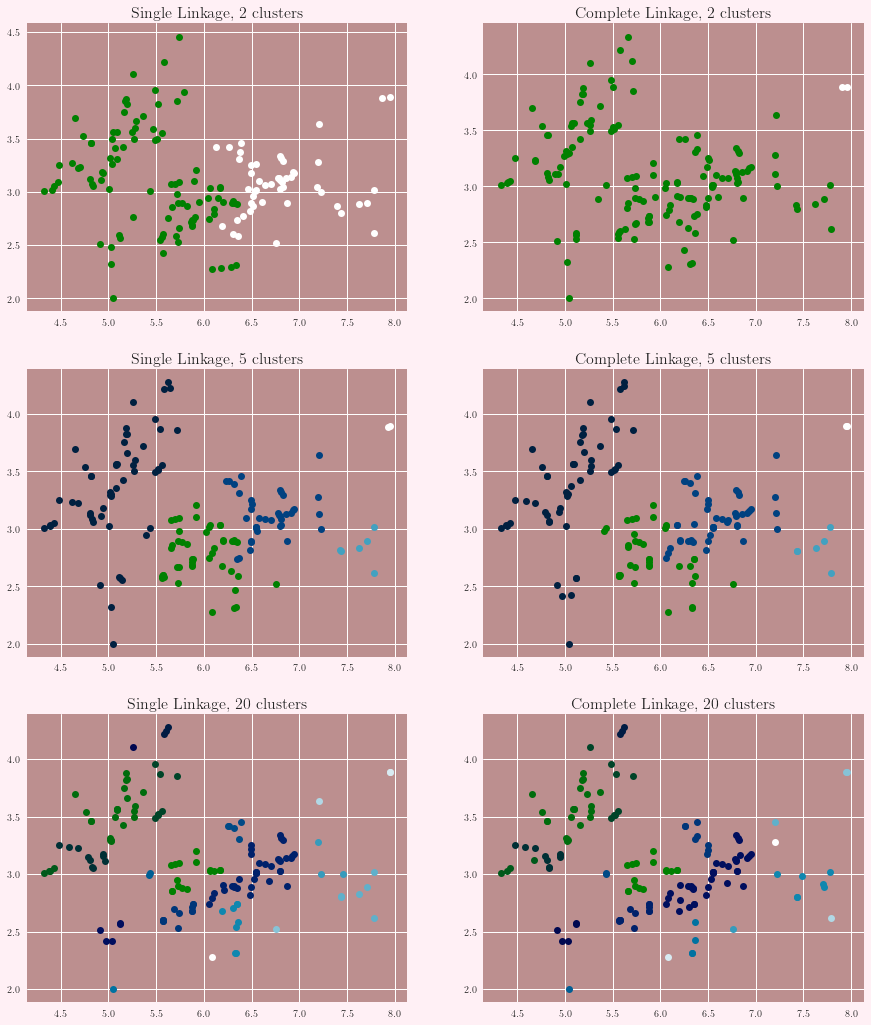

In [5]:
methods = ["min", "max"]
linkages = ["Single Linkage", "Complete Linkage"]
clusters = [2, 5, 20]
fig, ax = plt.subplots(len(clusters),len(linkages),figsize = (15, 18))

for i, cluster in enumerate(clusters):
    for j, linkage in enumerate(linkages):
        z, _ = ml.cluster.agglomerative(X, K=cluster, method=linkage)
        ml.plotClassify2D(None, X, z, axis=ax[i][j])
        ax[i][j].set_title('%s, %d clusters' % (linkage, cluster))

plt.show()

## Describe similarities and differences in the results from the agglomerative clustering and k-means.

**Similarities**

Interestingly, the graph for k-means $k=2$ and Single Linkage $k=2$ look remarkably similar. I find this interesting because for both graphs at $x=6.0$ and above the $y=2.5$ line, the graphs are practically identical.  However, for the quadrant of points that are around $(6.0, 2.5)$, Single Linkage categorizes it as the green class, while K-means categorizes it as the white class.  It would be interesting to analyze these particular points to determine what produces that difference, yet with the k-value so low it might not be particularly relevant.

When $k=5$, Single Linkage and Complete Linkage are practically identical, save for a couple points in the $(6.0, 2.5)$-area cluster.

When $k=20$ above the line that linearly separates the two chunks of data, Single Linkage and Complete Linkage look to be identical.  Below the line, there are a few differences in some points, again near the area of the $(6.0, 2.5)$ quadrant.  Perhaps there is something significant about Irises with this sepal length/width, perhaps it is harder to distinguish them.

**Differences**

When $k \lt 5$, there is a stark difference in terms of the cluster assignments.  As we can see in the k-means clustering when $k=2$, the data is roughly separated in half, and almost follows the line for linearly separable data.  Whereas when $k=2$ for Complete linkage, there are only two data points that are classified in one class, and all of the others are classified in the green class.  However, we do not see this issue with Single Linkage for $k=2$.

While there are a few differences between the Single and Complete Linkage (see above discussion), they are minute in comparison to the differences with the K-means clustering.

When $k=5$, Single and Complete Linkage both categorize the points above the linearly separable line in the same class, while K-means separates it into two.

# EigenFaces

<Figure size 576x396 with 0 Axes>

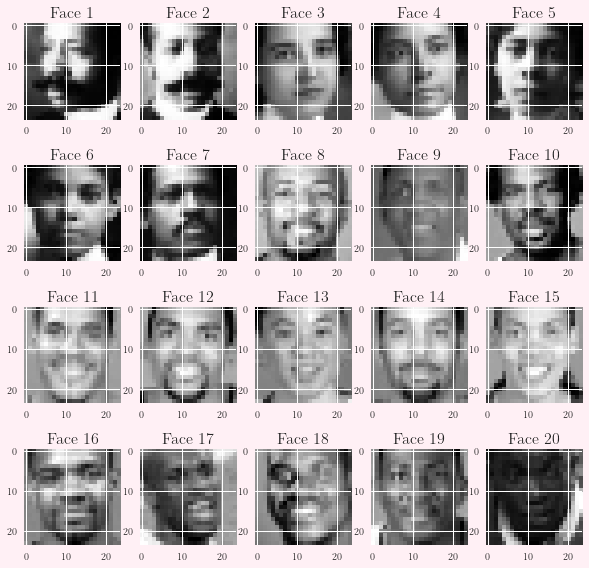

In [6]:
X = np.genfromtxt("data/faces.txt", delimiter=None)  # load face dataset
plt.figure()

# pick the first 20 faces for display
f, ax = plt.subplots(4, 5, figsize=(10, 10))
ax = ax.flatten()

for i in range(len(ax)):
    # convert vectorized data to 24x24 image patches
    img = np.reshape(X[i,:] ,(24, 24))
    face = str(i + 1)
    ax[i].set_title("Face " + face)
    ax[i].imshow(img.T , cmap="gray")  # display image patch;
plt.show()

## Subtract the mean of the face images $(X_0 = X − \mu)$ to make your data zero-mean. (The mean should be of the same dimension as a face, 576 pixels.) Plot the mean face.

Shape of mean:  576

-----------------------
       Mean Face
-----------------------


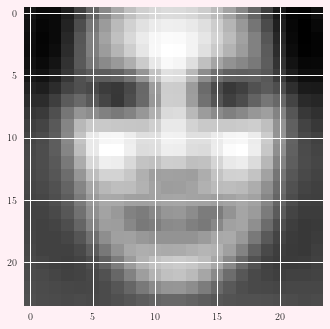

In [7]:
mu = X.mean(axis=0, keepdims=True)
print("Shape of mean: ", mu.shape[1])

# Subtract the mean
X0 = X - mu

print("\n-----------------------")
print("       Mean Face")
print("-----------------------")
plt.figure()
img = np.reshape(mu, (24, 24))
plt.imshow(img.T, cmap="gray")

plt.show()

## Use `scipy.linalg.svd` to take the SVD of the data, so that $X_0 = U \cdot diag(S) \cdot V^T$.  Since the number of data points is larger than the number of dimensions, there are at most 576 non- zero singular values; you can use full_matrices=False to avoid using a lot of memory. As in the slides, we suggest computing `W = U.dot( np.diag(S) )` so that $X_0 \approx W \cdot V^T$. Print the shapes of $W$ and $V^T$.

In [8]:
import scipy.linalg

U, S, V = scipy.linalg.svd(X0, False)
W = U.dot(np.diag(S))

print("Shape of W: ", W.shape)
print("Shape of V^T: ", V.shape)

Shape of W:  (4916, 576)
Shape of V^T:  (576, 576)


## For `K = 1 . . . 12`, compute the approximation to $X_0$ given by the first K eigenvectors, e.g., $\hat{X_0} = W [:, : K] · V^T[: K, :]$, and use them to compute the mean squared error in the SVD’s approximation, `np.mean( (X0−Xˆ0)**2 )` Plot these MSE values as a function of K.

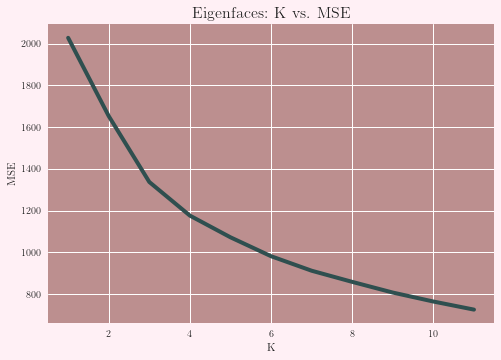

In [9]:
K = range(1,12)
err = np.zeros(len(K))

for k in K:
    Xhat0 = W[:, :k].dot(V[:k,:])
    err[k-1] = np.mean((X0 - Xhat0)**2)

plt.plot(K, err, linewidth=4)
plt.xlabel("K")
plt.ylabel("MSE")
plt.title("Eigenfaces: K vs. MSE")
plt.show()

## Display the first three principal components of the data, by computing μ+α V[j,:] and μ-α V[j,:], where α is a scale factor (we suggest, for example, 2*np.median(np.abs(W[:,j])), to get a sense of the scale found in the data). These should be vectors of length 242 = 576, so you can reshape them and view them as “face images” just like the original data.

<Figure size 576x396 with 0 Axes>

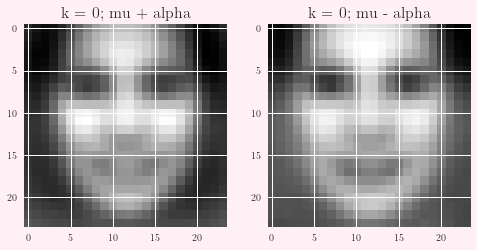

<Figure size 576x396 with 0 Axes>

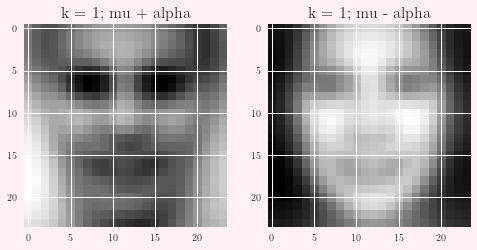

<Figure size 576x396 with 0 Axes>

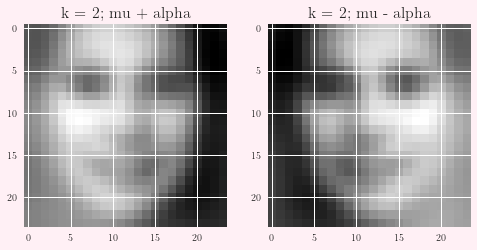

In [10]:
# How the faces vary along the first three principal component
for k in range(3):
    alpha = 2*np.median(np.abs(W[:,k]))

    im1 = np.reshape(mu + alpha*V[k,:], (24,24))
    im2 = np.reshape(mu - alpha*V[k,:], (24,24))

    plt.figure()
    f, (ax1,ax2) = plt.subplots(1,2)

    ax1.set_title("k = "+ k.__str__() + "; mu + alpha")
    ax2.set_title("k = "+ k.__str__() +"; mu - alpha")

    ax1.imshow(im1.T, cmap="gray")
    ax2.imshow(im2.T, cmap="gray")

## Choose any two faces and reconstruct them using the first K principal directions, for K = 5, 10, 50, 100.

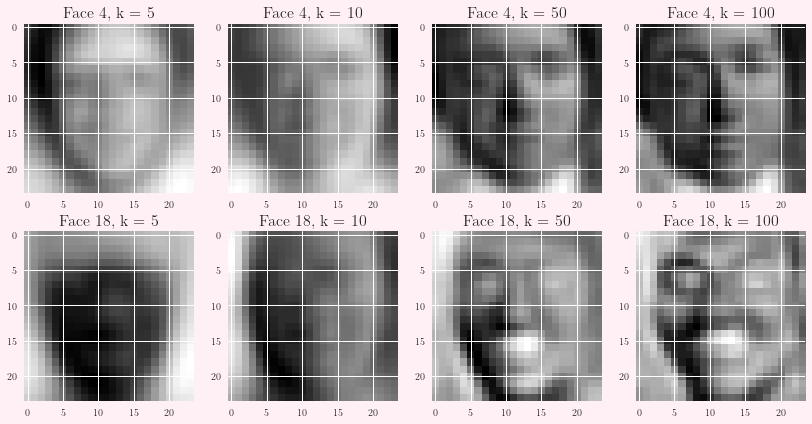

In [11]:
fig, ax = plt.subplots(2, 4, figsize = (14, 7))

# Faces 4 and 18, as seen in the figure for 2.1
faces = [4, 18]
K = [5, 10, 50, 100]

for i, face in enumerate(faces):
    for j, k in enumerate(K):
        img = W[face-1,:k].dot(V[:k,:])
        img = np.reshape(img, (24,24))

        ax[i][j].set_title('Face %d, k = %d' % (face, k))
        ax[i][j].imshow(img.T , cmap="gray")

plt.show()

## Methods like PCA are often called “latent space” methods, as the coefficients can be interpreted as a new geometric space in which the data are being described. To visualize this, choose a few faces (say 25), and place them in a two-dimensional plane, where the two-dimensional coordinates are given by their coefficients on the first two principal components:

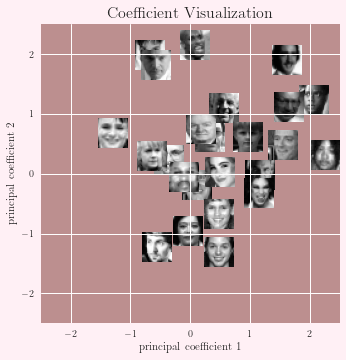

In [12]:
import mltools.transforms

faces = np.random.randint(0, high=len(X), size=25)
coord, params = ml.transforms.rescale(W[:,0:2])

for face in faces:
    loc = (coord[face, 0], coord[face, 0] + .5, coord[face, 1], coord[face, 1] + .5)
    plt.imshow(np.reshape(X[face, :], (24, 24)).T , cmap="gray", extent=loc)
    plt.title("Coefficient Visualization")
    plt.xlabel("principal coefficient 1")
    plt.ylabel("principal coefficient 2")
    plt.axis((-2.5, 2.5, -2.5, 2.5))

# Statement of Collaboration

I did not cheat on this assignment and I did not collaborate with my classmates for this assignment.
